# Deep learning regression with Keras and CNTK

In [ ]:
import os
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Helper function to plot the dataset

In [ ]:
def plot_dataset(features, labels):
    x_coords = features[0:features.shape[0], 0:1]
    y_coords = features[0:features.shape[0], 1:2]
    
    f, ax = plt.subplots(figsize=(8, 6))    
    ax.scatter(x_coords, y_coords, c=labels, s=50, cmap="coolwarm", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)   
    plt.show()

### Helper function to plot the decision boundary in a classification model

In [ ]:
def plot_classification_model_decision_boundary(model, features, labels):
    xx, yy = np.mgrid[0:850:5, 0:850:5]
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    predicted_grid_probabilities = model.predict_proba(grid)
    
    f, ax = plt.subplots(figsize=(8, 6))

    #http://matplotlib.org/examples/color/colormaps_reference.html
    contour = ax.contourf(xx, yy, predicted_grid_probabilities.reshape(xx.shape[0],yy.shape[0]), 25, cmap="coolwarm",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    
    x_coords = features[0:features.shape[0], 0:1]
    y_coords = features[0:features.shape[0], 1:2]
    
    ax.scatter(x_coords, y_coords, c=labels, s=50, cmap="coolwarm", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
    plt.show()

### Helper function to train a deep learning model 

In [ ]:
def train_model(features, labels, hidden_activation, output_activation, loss_function, iterations):   
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=2, activation=hidden_activation)) 
    model.add(Dense(8, activation=hidden_activation))
    model.add(Dense(1, activation=output_activation))
    
    # Compile model
    model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])   
      
    # Fit the model
    model.fit(features, labels, epochs=iterations, batch_size=10)
    return model

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

### Load and plot a linear dataset

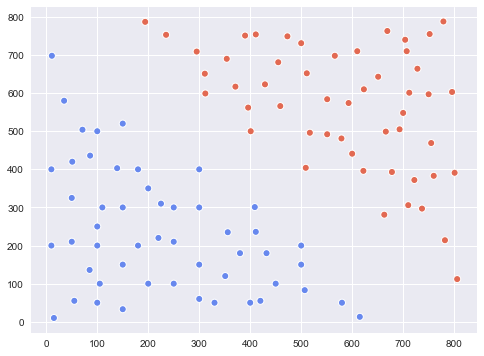

In [33]:
df = pd.read_csv('.\\regression_linear_data.csv')
features = np.array(df.as_matrix(columns= df.columns[0:2]))
labels = np.array(df.as_matrix(columns= df.columns[2:3]))
#df.head(5)
plot_dataset(features, labels)

### Let's separate our data into a training and a test set, so we can score the model with new data

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2)

# Let's train a linear classifier to make predictions

On Keras, loss function should be 'mse' for 'linear' activation, and 'binary_crossentropy' for 'sigmoid' activation (binary classification problem). 
For more information on what loss functions and optimizers to use: https://keras.io/getting-started/sequential-model-guide/#compilation

In [ ]:
model = train_model(features_train, labels_train, hidden_activation='linear', output_activation='linear', loss_function='mse', iterations=300)

### Let's plot the decision boundary for this classifier

28416/28900 [============================>.] - ETA: 0s

C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:998: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


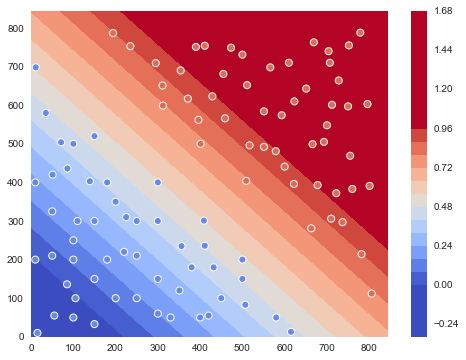

In [39]:
plot_classification_model_decision_boundary(model, features, labels)

### Let's score the model with new data

In [ ]:
scores = model.evaluate(features_test, labels_test, verbose=0)
print('test score:', scores[0])
print('test accuracy:', scores[1])

### mmm, that was cool, but can we actually get a real probability instead of that range?

Yes!, we are almost there. As we saw before linear activation don't squash the data, but sigmoid has this property that it will squash the output into a probability. Also, when using the sigmoid activation on the output layer, we need to use 'binary_crossentropy' as the loss function (the thing we want to reduce duting back propagation).

For more information of what loss funtions and optimizers to use: https://keras.io/getting-started/sequential-model-guide/#compilation

In [ ]:
model = train_model(features_train, labels_train, hidden_activation='linear', output_activation='sigmoid', loss_function='binary_crossentropy', iterations=500)

### Let's plot the classification boundary of this new model, the range should be from 0 to 1 since the output is now a probability.

28256/28900 [============================>.] - ETA: 0s

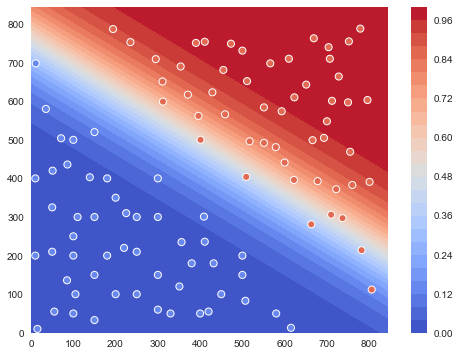

In [48]:
plot_classification_model_decision_boundary(model, features, labels)

#### Let's score the model with data that it has not seen before

In [ ]:
# Now score the model with data that it has not seen before.
scores = model.evaluate(features_test, labels_test, verbose=0)
print('test score:', scores[0])
print('test accuracy:', scores[1])

## Now let's load a non-linear dataset and see how it looks

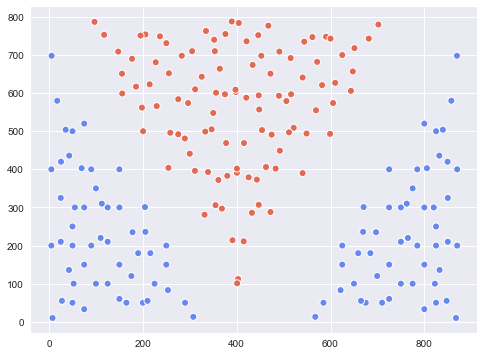

In [51]:
df = pd.read_csv('.\\regression_non_linear_data.csv')
features = np.array(df.as_matrix(columns= df.columns[0:2]))
labels = np.array(df.as_matrix(columns= df.columns[2:3]))
plot_dataset(features, labels)

###  Again, let's separate our training, and test sets

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2)

## Let's see how a linear classifier behaves on this non-linear data (hint: it sucks).

In [ ]:
model = train_model(features_train, labels_train, hidden_activation='linear', output_activation='linear', loss_function='mse', iterations = 300)

28192/28900 [============================>.] - ETA: 0s

C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:998: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


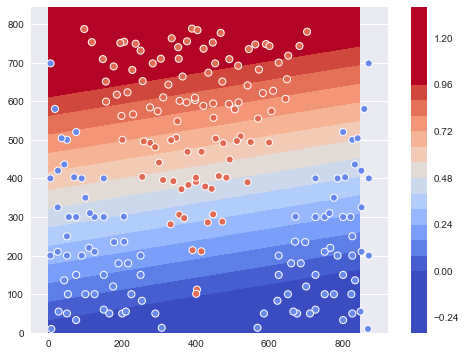

In [59]:
plot_classification_model_decision_boundary(model, features, labels)

Yeah, this is bad since we are trying to force a linear classification into some non-linear data. We don't even need to score this model, so move on.

## Now let's train a non-linear classifier with this data and see how it performs

As a general rule of thumb, we will always use relu (or leaky relu) as our activation function for all the hidden layers. In the output layer we either might want to use sigmoid (probability), or softmax (classification). 
More info into basic Keras activations here: https://keras.io/activations/

In [ ]:
model = train_model(features_train, labels_train, hidden_activation='relu', output_activation='sigmoid', loss_function='binary_crossentropy', iterations=400)

27680/28900 [===========================>..] - ETA: 0s

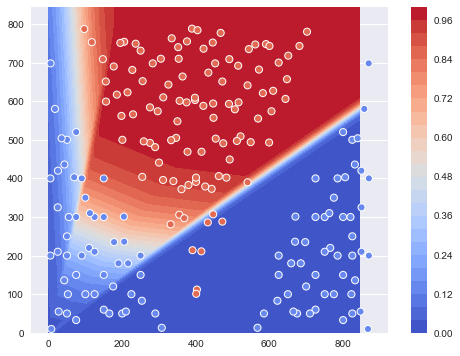

In [65]:
plot_classification_model_decision_boundary(model, features, labels)

### Not bad uhh!. Now let's see the score of this model

In [ ]:
scores = model.evaluate(features_test, labels_test, verbose=0)
print('test score:', scores[0])
print('test accuracy:', scores[1])